# **Neural Networks Demystified [Part 2]**

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Before this lecture, check out [Nueral Networks Demystified Parts 5-7](https://www.youtube.com/watch?v=pHMzNW8Agq4).
- Here's our data from last time:

In [4]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

#Normalize Data
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

- Last time, we dug deep into **backpropogation**.
- Here's our backpropogation algorithm algorithm, wrapped up into our python class. 
- We've also added methods for getting and setting parameters.

In [100]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

## Let's make sure the big picture makes sense here.

![](../graphics/NNQ9-01.png)

---

Let's try it!

In [78]:
NN = Neural_Network()
cost1 = NN.costFunction(X, y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

learning_rate = 0.1
NN.W1 = NN.W1 + learning_rate*dJdW1
NN.W2 = NN.W2 + learning_rate*dJdW2
cost2 = NN.costFunction(X,y)
print(cost1, cost2, cost2>cost1)

0.6520198580687961 0.6612722413384402 True


![](../graphics/NNQ10-01.png)

---

In [99]:
NN = Neural_Network()
cost1 = NN.costFunction(X, y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

learning_rate = 0.1
NN.W1 = NN.W1 - learning_rate*dJdW1
NN.W2 = NN.W2 - learning_rate*dJdW2
cost2 = NN.costFunction(X,y)
print(cost1, cost2, cost2>cost1)

0.08163720870784237 0.07906400354005673 False


## **This is the heart of gradient descent.**

- Taking small steps "downhill", we can find a solution in the 9-dimensional weight space of our function.

In [150]:
NN = Neural_Network()
learning_rate = 0.1
costs = []

for i in range(1000):
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

    learning_rate = 0.1
    NN.W1 = NN.W1 - learning_rate*dJdW1
    NN.W2 = NN.W2 - learning_rate*dJdW2
    cost = NN.costFunction(X,y)
    costs.append(cost)

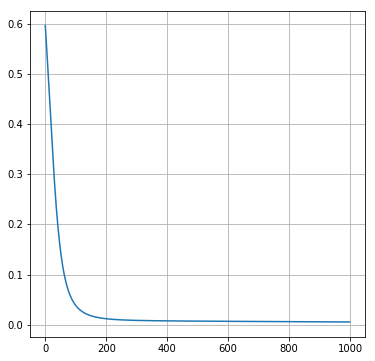

In [155]:
fig = figure(0, (6,6))
plot(costs)
grid(1)